### ***Version Info:***

*   I was working on **Ubuntu 22.04 (Jammy)** via WSL 2 and have installed **ROS 2 Humble** following this tutorial :
[ROS 2 Packages](https://docs.ros.org/en/humble/Installation/Ubuntu-Install-Debians.html)

### ***Autocompletion***

*   By following these steps, one can enable autocompletion for colcon commands in the bash shell. This means that after typing part of a colcon command and pressing Tab, the shell would suggest or automatically complete the rest of the command based on available options.

    1.   Go to :
        ```
        cd /usr/share/colcon_argcomplete/hook/
        ```
    2.   Type `ls` command and output of it should be like :
        ```
        colcon-argcomplete.bash   colcon-argcomplete.zsh
        ```
    3. Then , do `gedit ~/.bashrc` and add this line to the end of the `.bashrc` file :
        ```
        source /usr/share/colcon_argcomplete/hook/colcon-argcomplete.bash
    ```

### ***Setting up basic ROS 2 workspace***

*  By following these steps, we are setting up a ROS 2 workspace where one can develop ROS 2 packages, build them, and ensure the environment is correctly configured to use them. :
    ```
    mkdir ros2_ws
    ```

    ```
    cd ros2_ws/
    ls # it will be empty
    ```

    ```
    mkdir src
    ls # you will have : src
    ```

    ```
    colcon build
    ls # you will have : build  install  log  src
    ```

  Then , do `gedit ~/.bashrc` and add this line to the end of the `.bashrc` file to build and source the workspace :

  ```
  source ~/ros2_ws/install/setup.bash
  ```

### ***VS Code in WSL 2***

One can use VS Code via WSL 2 , but it will be necessary to install 'WSL' in the Extensions (Ctrl + Shift + X) section in VS Code , open WSL terminal and type :

      ```
      # will launch a new instance of VS Code connected to WSL
      code .  
      ```


*   It is advisable to install following extensions for working with ROS in VS Code :

    1.  **ROS** (Install it and switch to pre-release version)
    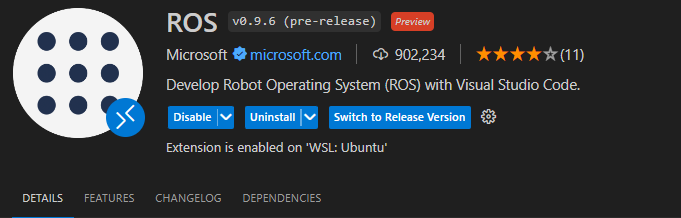
    2.   **ROS snippets**
    3. **Remote - SSH** (Install it and switch to pre-release version)
    4. **3D Viewer for VSCode** (for .obj files)

### ***URDF Previewer in VS Code***
Using VS Code one see how changes in your URDF file affect the robot's visual representation without needing to launch external tools.

To preview the URDF file after each update do `Ctrl + Shift + P ` and type : `ROS : Preview URDF`.

Here , as provided in the image below I have build the URDF file for `the green and blue prisms` and was able to visualize how they look after each change to the code.

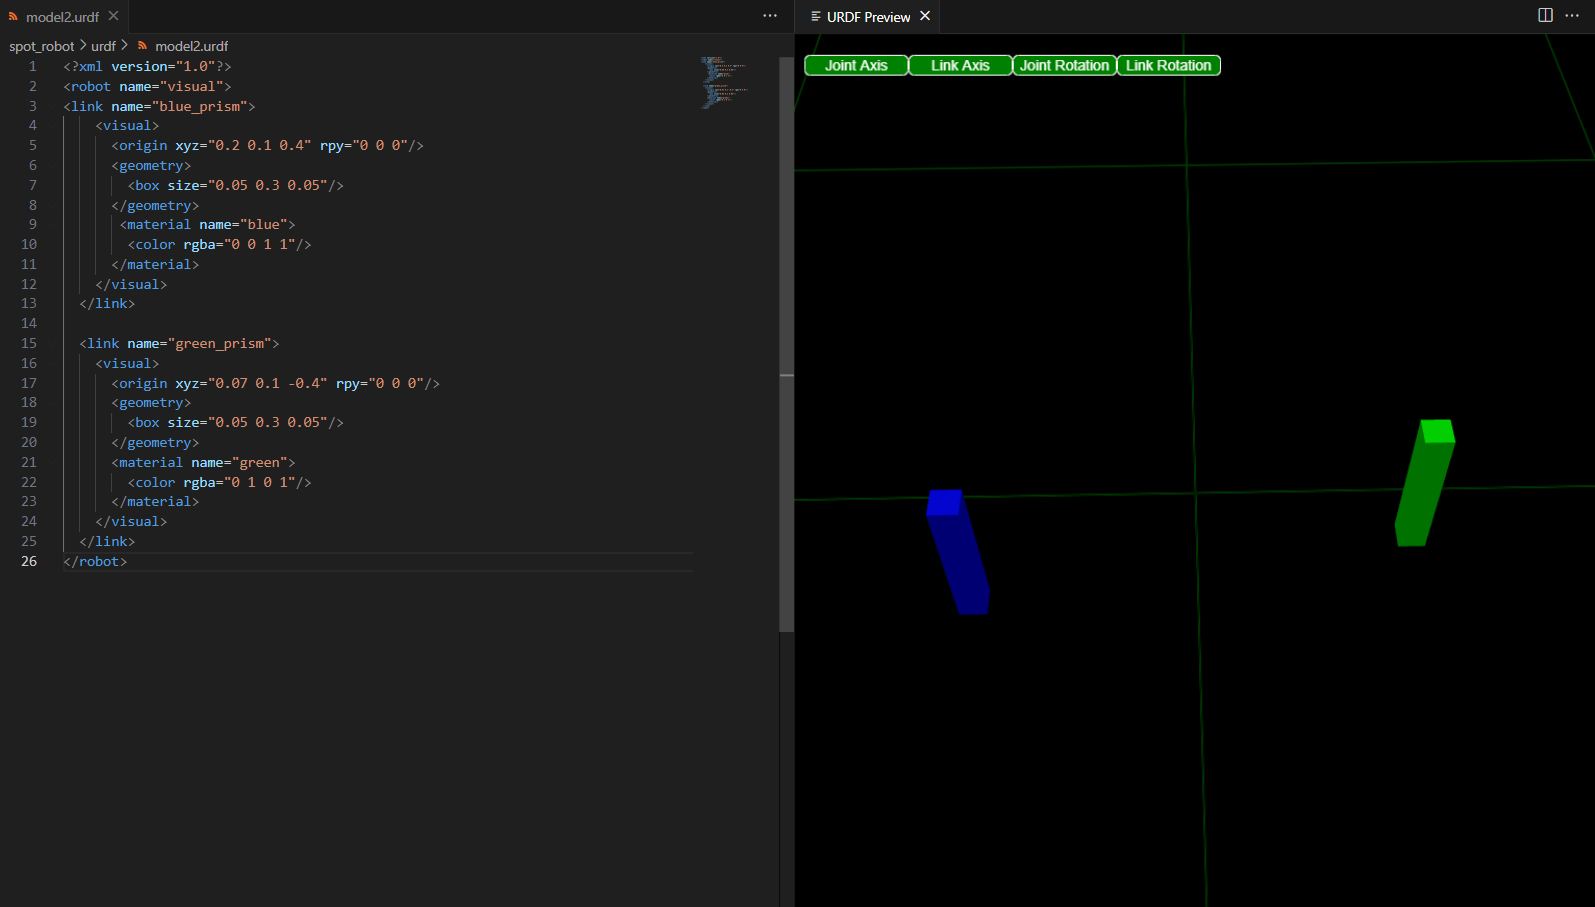

### **VS Code Issue 1 :**
  `ROS 2 status : offline`

  ### **Solution :**
  Do `Ctrl + Shift + P` and try `ROS : stop ` and then `ROS : start `

### **VS Code Issue 2 :**
`Command failed: bash --login -c "xacro '/home/fifi/ros2_ws/src/spot_robot/urdf/model.urdf' && env" bash: line 1: xacro: command not found`

### **Solution :**



*   Install xacro :
    ```
    sudo apt-get install ros-humble-xacro
    ```

*   Source ROS environment/workspace :
    ```
    source /opt/ros/humble/setup.bash
    ```

    ```
    source ~/ros2_ws/install/setup.bash
    ```

*   Run command again :

    ```
    bash --login -c "xacro '/home/fifi/ros2_ws/src/spot_robot/urdf/model.urdf' && env"
    ```

### ***Creating a package for SPOT robot***

*   Go to the workspace inside of the src folder :
    ```
    cd ros2_ws/
    ```
*   Create the necessary package (`spot_robot`) for spot robot :
    ```
     ros2 pkg create spot_robot --build-type ament_python --dependencies rclpy
    ```

*   Build newly created package
    ```
    colcon build
    ```

*   Go to VS Code (`code .`).
*   Open the `src` folder. You should see `spot_robot` package inside it.
*   Create folders `urdf` and `meshes` inside the `spot_robot` package.
*   Add your `urdf files (model.urdf)` inside the `urdf` folder.
*   Add your `.obj files` inside the `meshes` folder.











### ***Visualizing it in RVIZ***

  After checking that the meshes are located properly (for example testing : `ls ros2_ws/src/spot_robot/meshes/fl.hip.obj`) , I have visualized the URDF file for the SPOT robot uisng RVIZ following the steps below :

  ```
  sudo apt install ros-humble-urdf-tutorial
  ```

  ```
  # Navigate to the directory containing URDF file
  cd ros2_ws/src/spot_robot/urdf  
  ```

  ```
  # Launch the URDF visualization tool
  ros2 launch urdf_tutorial display.launch.py model:=/home/fifi/ros2_ws/src/spot_robot/urdf/model.urdf
  ```

  ```
  # We ensure that any changes we've made are compiled
  # and the environment is updated by rebuilding our workspace and sourcing the setup file :
  cd ~/ros2_ws
  colcon build
  . install/setup.bash
  ```

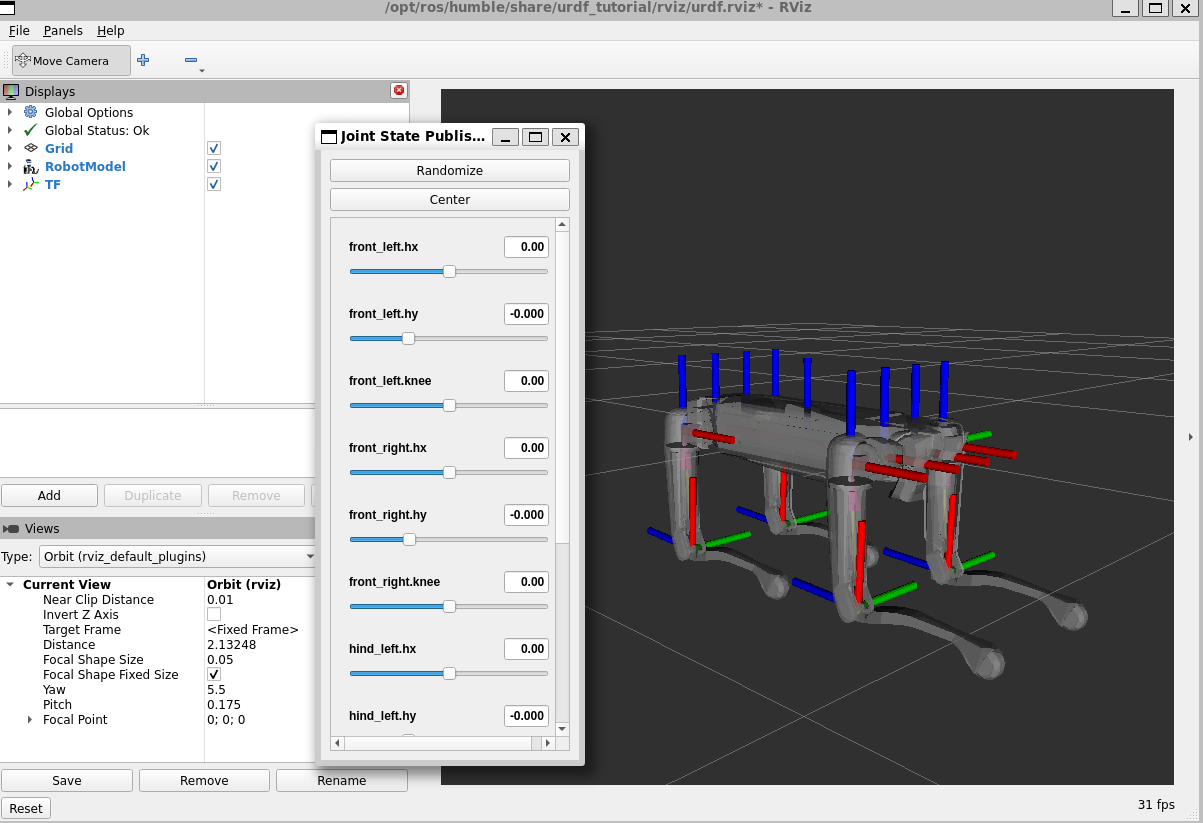